In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [76]:
titanic = pd.read_csv("C:/Users/HPWorld/aiml/DataSet/train.csv")

In [77]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,45.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


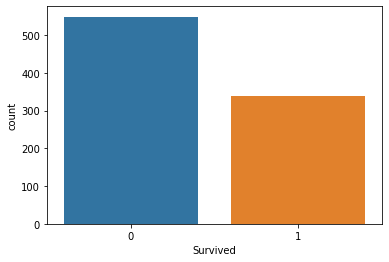

In [78]:
sns.countplot(x ='Survived',data=titanic)

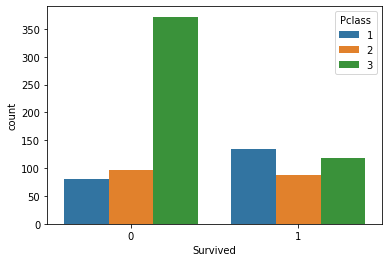

In [79]:
sns.countplot(x ="Survived", hue="Pclass", data=titanic)

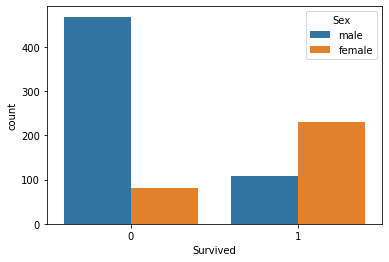

In [80]:
sns.countplot(x ="Survived", hue="Sex", data=titanic)

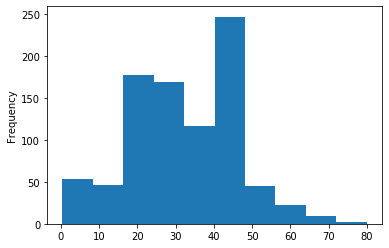

In [81]:
titanic['Age'].plot.hist()

In [82]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [83]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
titanic.drop('Cabin', axis=1,inplace=True)

In [85]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [86]:
titanic.dropna(inplace=True)

In [87]:
Sex1 = pd.get_dummies(titanic['Sex'],drop_first=True)

In [88]:
Sex1.head(4)

,male
0,1
1,0
2,0
3,0


In [89]:
Pclass1 =pd.get_dummies(titanic['Pclass'],drop_first=True)

In [90]:
Pclass1.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [91]:
Embarked1 =pd.get_dummies(titanic['Embarked'],drop_first=True)

In [92]:
Embarked1.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [93]:
titanic = pd.concat([titanic,Sex1,Pclass1,Embarked1],axis=1)

In [94]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1


In [95]:
titanic.drop(['Sex','Embarked','PassengerId','Pclass','Name','Ticket'],axis=1,inplace=True)

In [96]:
titanic.head(3)

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1


### Train Data

In [97]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [99]:
logis = LogisticRegression()

In [100]:
logis.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
predictions = logis.predict(X_test)

In [103]:
from sklearn.metrics import classification_report

In [108]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.86      0.87      0.86       166\n           1       0.78      0.76      0.77       101\n\n    accuracy                           0.83       267\n   macro avg       0.82      0.81      0.82       267\nweighted avg       0.83      0.83      0.83       267\n'

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [111]:
confusion_matrix(y_test,predictions)

array([[144,  22],
       [ 24,  77]], dtype=int64)

In [112]:
accuracy_score(y_test,predictions)

0.8277153558052435